In [24]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np


In [25]:
red_band_path = "D:\GIS\S2B_MSIL1C_20221129T051149_N0400_R019_T43QHV_20221129T060354.SAFE\GRANULE\L1C_T43QHV_A029932_20221129T051146\IMG_DATA\T43QHV_20221129T051149_B04.jp2"
nir_band_path = "D:\GIS\S2B_MSIL1C_20221129T051149_N0400_R019_T43QHV_20221129T060354.SAFE\GRANULE\L1C_T43QHV_A029932_20221129T051146\IMG_DATA\T43QHV_20221129T051149_B08.jp2"


In [26]:
shapefile_path = r"D:\GIS\shapefiles\farm.shp"

In [27]:
print(shapefile_path)

D:\GIS\shapefiles\farm.shp


In [28]:
shapefile = gpd.read_file(shapefile_path)

In [29]:
crs = shapefile.crs
print(crs)


EPSG:32643


In [30]:
print(shapefile.head())

   id  poly1                                           geometry
0   1  farm1  POLYGON ((862574.339 1929622.610, 862635.670 1...
1   2  farm2  POLYGON ((862556.263 1925388.662, 862558.800 1...
2   3  farm3  POLYGON ((862099.228 1926142.966, 862085.528 1...
3   4  farm4  POLYGON ((863983.435 1926722.283, 863964.154 1...
4   5  farm5  POLYGON ((861509.446 1923907.198, 861509.509 1...


In [31]:
with rasterio.open(red_band_path) as red_src:
    red_clipped, red_transform = mask(red_src, shapefile.geometry, crop=True)
    red = red_clipped[0].astype('float32')

In [32]:
a = rasterio.open(red_band_path)
crs =a.crs
print(crs)

EPSG:32643


In [33]:
with rasterio.open(nir_band_path) as nir_src:
    nir_clipped, nir_transform = mask(nir_src, shapefile.geometry, crop=True)
    nir = nir_clipped[0].astype('float32')

In [34]:
b =rasterio.open(nir_band_path)
print(b)
b.crs

<open DatasetReader name='D:/GIS/S2B_MSIL1C_20221129T051149_N0400_R019_T43QHV_20221129T060354.SAFE/GRANULE/L1C_T43QHV_A029932_20221129T051146/IMG_DATA/T43QHV_20221129T051149_B08.jp2' mode='r'>


CRS.from_epsg(32643)

In [35]:
print(nir.shape)

(1518, 1181)


In [36]:
print(red.shape)

(1518, 1181)


In [37]:
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:

ndvi = (nir- red)/(nir + red)

C:\Users\sudhi\AppData\Local\Temp\ipykernel_19484\1592723588.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir- red)/(nir + red)


In [39]:
ndvi

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

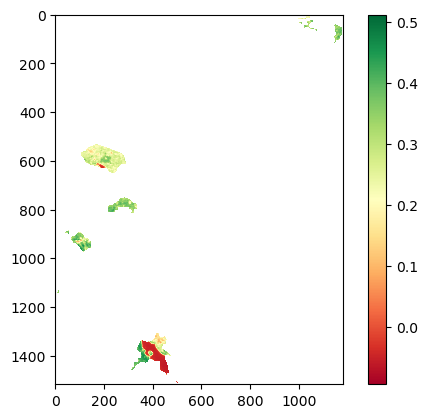

In [44]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.show()